In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline 

In [21]:
norens = pd.read_csv('DATA/ENS_AGEBS_ITSE.csv')
norens.head()

,index_2010,AGEB,P_TOTAL_2010,POB65_MAS_2010,GRAPROES_2010,PROM_HNV_2010,VIVTOT_2010,PRO_OCUP_C_2010,PROM_OCUP_2010,VPH_PC_2010,...,cambio_computadora,puntaje_poblacion,puntaje_ninos,puntaje_adultos_mayores,puntaje_educacion,puntaje_hijos,puntaje_viviendas,puntaje_ocupantes,puntaje_computadora,ITSE
0,4,0435,3632,325,9.617302,2.193333,1321,0.853016,3.352540,584,...,198,1,1,-1,-1,1,1,1,1,4
1,68,044A,1539,224,9.569643,2.264286,549,0.750714,3.152143,254,...,76,-1,1,1,-1,1,-1,1,-1,0
2,97,0454,2211,188,10.994717,1.929057,742,0.661887,3.145849,438,...,93,1,-1,-1,-1,1,1,1,1,2
3,151,0488,2045,140,8.206786,2.405357,635,1.056071,3.796071,189,...,120,1,1,-1,-1,1,1,1,1,4
4,180,0492,557,15,7.670000,0.912826,281,0.372609,1.648261,189,...,171,1,-1,-1,1,-1,1,-1,1,0


# INEGIpy variables

In [22]:
from INEGIpy import MarcoGeoestadistico

marco = MarcoGeoestadistico()

In [23]:
bc_municipios = marco.Municipios(entidades='02')
display(bc_municipios)

,geometry,cvegeo,cve_agee,cve_agem,nom_agem,cve_cab,pob,pob_fem,pob_mas,viv,nom_cab
0,"MULTIPOLYGON (((-115.57379 32.65919, -115.5498...",02002,02,002,Mexicali,0001,1049792,520544,529248,330500,NaN
1,"MULTIPOLYGON (((-115.86641 32.26873, -115.8584...",02001,02,001,Ensenada,0001,443807,222500,221307,139968,Asientos
2,"MULTIPOLYGON (((-115.64233 31.12645, -115.6268...",02006,02,006,San Quintín,0001,117568,57790,59778,32773,NaN
3,"MULTIPOLYGON (((-115.11450 31.80936, -115.1066...",02007,02,007,San Felipe,0001,NaN,NaN,NaN,NaN,San Felipe
4,"MULTIPOLYGON (((-117.10047 32.53656, -117.0992...",02004,02,004,Tijuana,0001,1922523,953783,968740,577011,NaN
5,"MULTIPOLYGON (((-117.05342 32.42209, -117.0528...",02005,02,005,Playas de Rosarito,0001,126890,62504,64386,38135,NaN
6,"MULTIPOLYGON (((-116.73856 32.56685, -116.7373...",02003,02,003,Tecate,0001,108440,51310,57130,31176,NaN


Clave Concatenada de Ensenada: 02001


<Axes: >

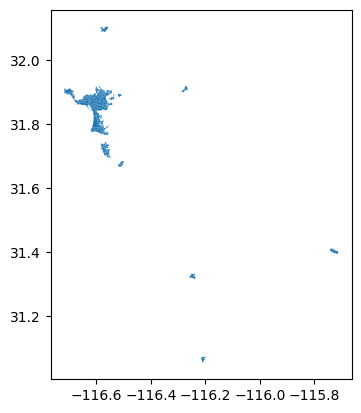

In [24]:
# podemos usar los valores de una tabla para apoyar en la búsqueda de otros valores cuando no se tenga la clave previamente
cve_concatenada = bc_municipios[bc_municipios.nom_agem == 'Ensenada'].cvegeo.iloc[0]
print('Clave Concatenada de Ensenada: {}'.format(cve_concatenada))
ens_agebs = marco.AGEBs(claves_concatenadas=cve_concatenada)
ens_agebs.plot()

In [25]:
bc_localidades = marco.LocalidadesAmanzanadas(entidades = '02', 
                                           municipios = '001')
display(bc_localidades.head(5))

,geometry,cvegeo,cve_agee,cve_agem,cve_loc,nom_loc,ambito,latitud,longitud,altitud,pob,viv,cve_carta,estatus,periodo
0,"MULTIPOLYGON (((-116.59744 31.91723, -116.5969...",020010001,02,001,0001,Ensenada,URBANO,31.8089439,-116.5951339,0018,330652,105810,H11B12,1,2015-06-01
1,"MULTIPOLYGON (((-116.37305 31.28129, -116.3717...",020010095,02,001,0095,Ejido Eréndira,RURAL,31.2733236,-116.3713950,0016,1711,517,H11B32,1,2015-06-01
2,"MULTIPOLYGON (((-116.58290 32.10414, -116.5828...",020010114,02,001,0114,Francisco Zarco (Valle de Guadalupe),URBANO,32.0969847,-116.5795778,0343,4334,1339,I11D82,1,2015-06-01
3,"MULTIPOLYGON (((-116.16108 30.97980, -116.1600...",020010118,02,001,0118,Licenciado Gustavo Díaz Ordaz,RURAL,30.9713356,-116.1544439,0050,1640,473,H11B53,1,2015-06-01
4,"MULTIPOLYGON (((-116.13264 31.93724, -116.1326...",020010121,02,001,0121,La Huerta,RURAL,31.9345175,-116.1327189,0959,110,32,H11B13,1,2015-06-01


Clave Concatenada de Ensenada: 020010001


<Axes: >

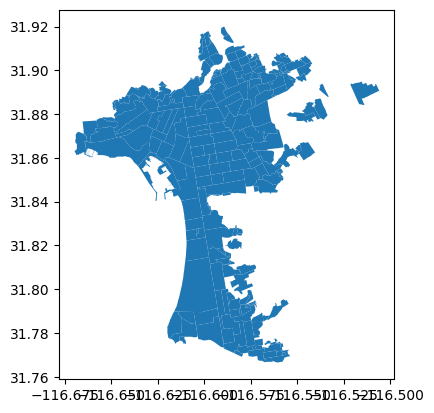

In [26]:
# podemos usar los valores de una tabla para apoyar en la búsqueda de otros valores cuando no se tenga la clave previamente

cve_concatenada = bc_localidades[bc_localidades.nom_loc == 'Ensenada'].cvegeo.iloc[0]
print('Clave Concatenada de Ensenada: {}'.format(cve_concatenada))
ens_agebs = marco.AGEBs(claves_concatenadas=cve_concatenada)
ens_agebs.plot()

In [27]:
ens_agebs.head()

,geometry,cve_agee,nom_agee,cve_agem,nom_agem,cve_loc,cvegeo,pobtot,pobmas,pobfem,tvivhab,cve_ageb
0,"MULTIPOLYGON (((-116.62805 31.86243, -116.6277...",02,Baja California,001,Ensenada,0001,0200100010632,124,108,16,9,0632
1,"MULTIPOLYGON (((-116.59889 31.87070, -116.5999...",02,Baja California,001,Ensenada,0001,0200100010670,1814,897,917,614,0670
2,"MULTIPOLYGON (((-116.57139 31.90713, -116.5712...",02,Baja California,001,Ensenada,0001,0200100011541,33,22,11,14,1541
3,"MULTIPOLYGON (((-116.59283 31.85752, -116.5929...",02,Baja California,001,Ensenada,0001,0200100017875,2048,972,1076,732,7875
4,"MULTIPOLYGON (((-116.55827 31.85301, -116.5587...",02,Baja California,001,Ensenada,0001,0200100011575,169,84,85,52,1575


guardamos TODAS las agebs correspondientes a ensenada en $todas\_agebs$

In [28]:
todas_agebs = ens_agebs['cve_ageb']

# ITSE

In [29]:
#dividimos agebs por puntaje ITSE en norens 
me_cuatro = norens[norens.ITSE == -1]
me_cuatro 

,index_2010,AGEB,P_TOTAL_2010,POB65_MAS_2010,GRAPROES_2010,PROM_HNV_2010,VIVTOT_2010,PRO_OCUP_C_2010,PROM_OCUP_2010,VPH_PC_2010,...,cambio_computadora,puntaje_poblacion,puntaje_ninos,puntaje_adultos_mayores,puntaje_educacion,puntaje_hijos,puntaje_viviendas,puntaje_ocupantes,puntaje_computadora,ITSE


In [30]:
me_cuatro = norens[norens.ITSE == -4]['AGEB']
list(me_cuatro)

['0558',
 '0562',
 '0632',
 '0651',
 '0736',
 '1240',
 '1397',
 '140A',
 '1486',
 '1518',
 '1522',
 '7447',
 '7451',
 '7767',
 '9551',
 '9744',
 '9829']

In [31]:
#dividimos agebs por puntaje ITSE en norens

m6 = norens[norens.ITSE == -6]['AGEB']
m5 = norens[norens.ITSE == -5]['AGEB']
m4 = norens[norens.ITSE == -4]['AGEB']
m3 = norens[norens.ITSE == -3]['AGEB']
m2 = norens[norens.ITSE == -2]['AGEB']
m1 = norens[norens.ITSE == -1]['AGEB']

cero = norens[norens.ITSE == 0]['AGEB']

p1 = norens[norens.ITSE == 1]['AGEB']
p2 = norens[norens.ITSE == 2]['AGEB']
p3 = norens[norens.ITSE == 3]['AGEB']
p4 = norens[norens.ITSE == 4]['AGEB']
p5 = norens[norens.ITSE == 5]['AGEB']
p6 = norens[norens.ITSE == 6]['AGEB']

<Axes: >

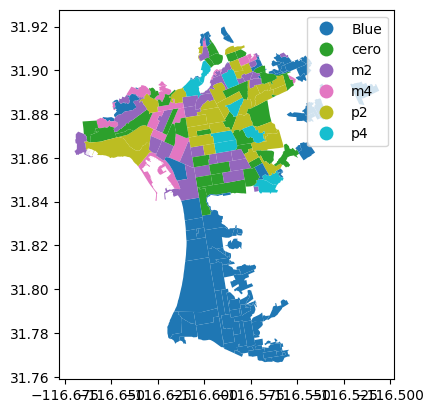

In [32]:
# Asignar un color diferente a cada subconjunto
ens_agebs['color'] = 'Blue'
ens_agebs.loc[ens_agebs.cve_ageb.isin(m4), 'color'] = 'm4'
ens_agebs.loc[ens_agebs.cve_ageb.isin(m3), 'color'] = 'm3'
ens_agebs.loc[ens_agebs.cve_ageb.isin(m2), 'color'] = 'm2'
ens_agebs.loc[ens_agebs.cve_ageb.isin(m1), 'color'] = 'm1'
ens_agebs.loc[ens_agebs.cve_ageb.isin(cero), 'color'] = 'cero'
ens_agebs.loc[ens_agebs.cve_ageb.isin(p1), 'color'] = 'p1'
ens_agebs.loc[ens_agebs.cve_ageb.isin(p2), 'color'] = 'p2'
ens_agebs.loc[ens_agebs.cve_ageb.isin(p3), 'color'] = 'p3'
ens_agebs.loc[ens_agebs.cve_ageb.isin(p4), 'color'] = 'p4'

# Plot
ens_agebs.plot(column='color', legend=True)

<Axes: >

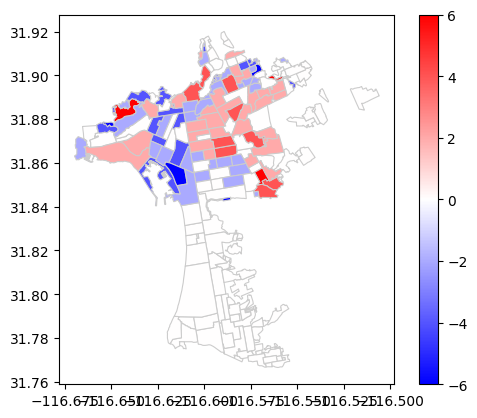

In [33]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#asignar un valor numérico a cada subconjunto
ens_agebs['color'] = 0
ens_agebs.loc[ens_agebs.cve_ageb.isin(m6), 'color'] = -6
ens_agebs.loc[ens_agebs.cve_ageb.isin(m5), 'color'] = -5
ens_agebs.loc[ens_agebs.cve_ageb.isin(m4), 'color'] = -4
ens_agebs.loc[ens_agebs.cve_ageb.isin(m3), 'color'] = -3
ens_agebs.loc[ens_agebs.cve_ageb.isin(m2), 'color'] = -2
ens_agebs.loc[ens_agebs.cve_ageb.isin(m1), 'color'] = -1
ens_agebs.loc[ens_agebs.cve_ageb.isin(p1), 'color'] = 1
ens_agebs.loc[ens_agebs.cve_ageb.isin(p2), 'color'] = 2
ens_agebs.loc[ens_agebs.cve_ageb.isin(p3), 'color'] = 3
ens_agebs.loc[ens_agebs.cve_ageb.isin(p4), 'color'] = 4
ens_agebs.loc[ens_agebs.cve_ageb.isin(p5), 'color'] = 5
ens_agebs.loc[ens_agebs.cve_ageb.isin(p6), 'color'] = 6

#crear un mapa de colores desde azul hasta rojo
cmap = mcolors.LinearSegmentedColormap.from_list("n",["blue", "white", "red"])

#plot
fig, ax = plt.subplots(1, 1)
ens_agebs.plot(column='color', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

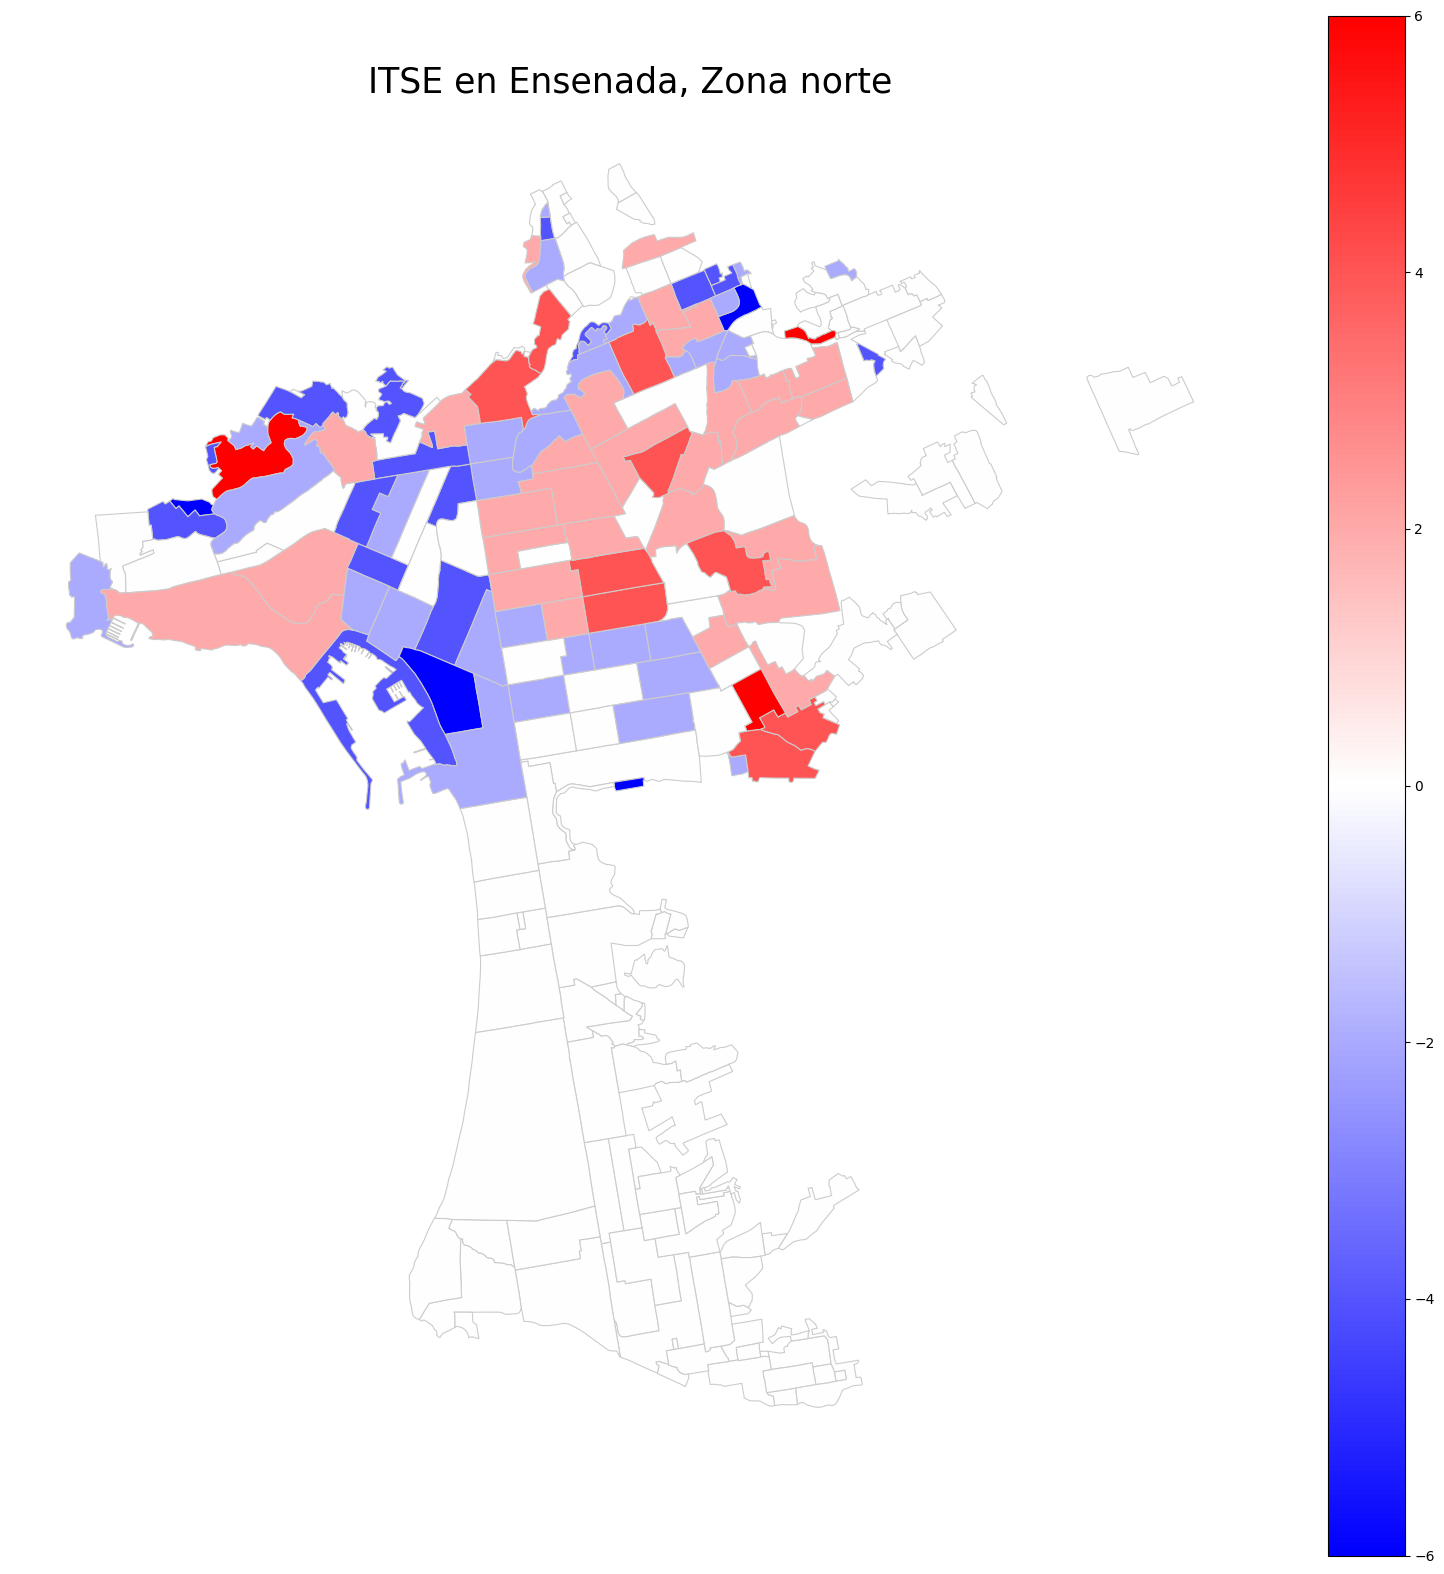

In [34]:
#plot con título y leyenda
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ens_agebs.plot(column='color', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.axis('off')
plt.title('ITSE en Ensenada, Zona norte', fontsize=25)
plt.savefig('ITSE_Ensenada.png')

#export image in the best resolution possible
plt.savefig('ITSE_Ensenada_HD.png', dpi=300)